# Drzewa decyzyjne #

Podczas wykonywania ćwiczenia będzie wykorzystywany pakiet scikit-learn (sklearn), którego metody umożliwiają m.in. budowę drzew decyzyjnych na podstawie danych, testowanie drzew oraz przeprowadzanie klasyfikacji.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
iris = load_iris()  #wczytujemy przykladowy zbior danych

Tworzymy obiekt dla drzewa.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [2]:
mytree1 = tree.DecisionTreeClassifier()

Uczymy klasyfikator na podstawie danych przykładowego zbioru danych iris (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [3]:
mytree1.fit(iris.data, iris.target)

DecisionTreeClassifier()

Korzystając z metody `get_params` można odczytać parametry konfiguracyjne drzewa.

In [4]:
mytree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Klasyfikujemy przykładowy wektor cech.

In [5]:
klasa = mytree1.predict([[2,3,4,5]])
print(iris.target_names[klasa])

['versicolor']


Można też wyznaczyć prawdopodobieństwa przynależności do poszczególnych klas.

In [6]:
mytree1.predict_proba([[2,3,4,5]])

array([[0., 1., 0.]])

# Struktura drzewa

Funkcja `plot_tree` umożliwia narysowanie grafu prezentującego skonstruowane drzewo decyzyjne.

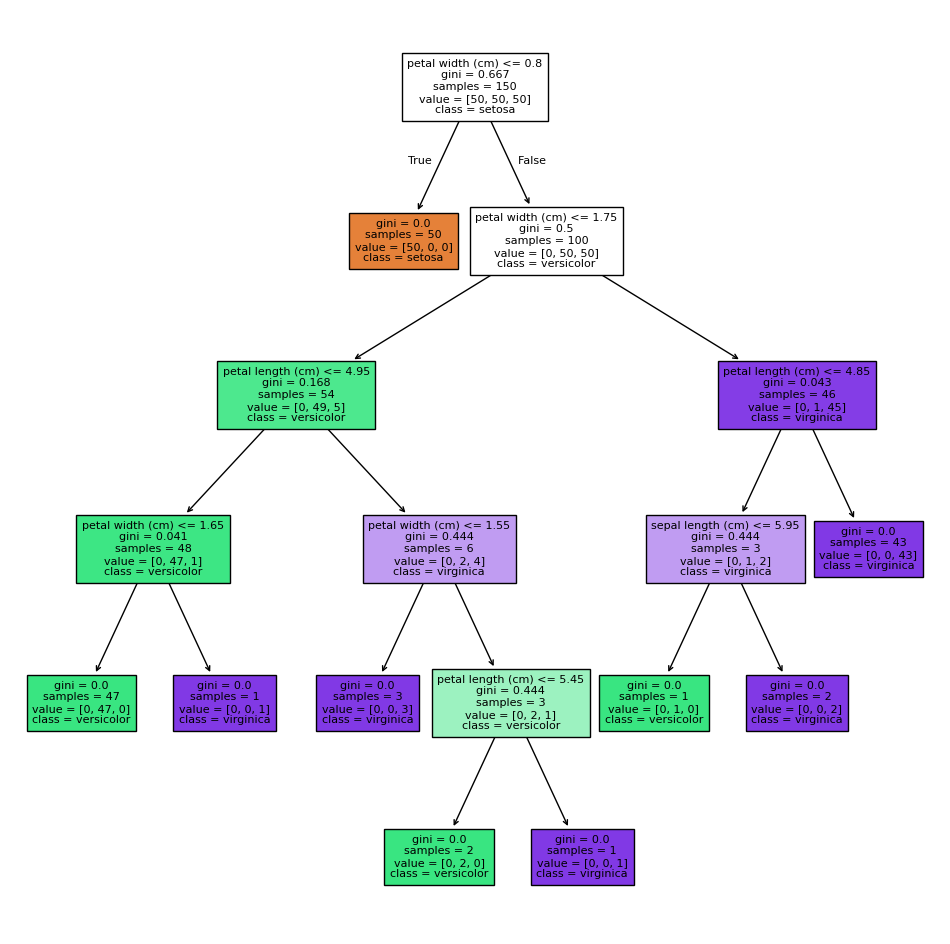

In [7]:
plt.figure(figsize=(12,12))
tree.plot_tree(mytree1, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, fontsize = 8)
plt.show()

Struktura drzewa zapisana jest w atrybucie `tree_`. Jest tam informacja o liczbie węzłów oraz tablice, w których dla każdego węzła zapisane są

* w przypadku węzłów wewnętrznych: indeks lewego i prawego potomka, indeks wybranego atrybutu i wartość progowa

* w przypadku liści: inne wartości, w tym wypadku nia mające znaczenia

Przeanalizuj sposób zapisu struktury drzewa mytree1.

In [8]:
print("Liczba wezlow: ", mytree1.tree_.node_count)
print("Indeksy lewych potomkow:", mytree1.tree_.children_left)
print("Indeksy prawych potomkow:",mytree1.tree_.children_right)
print("Wybrane atrybuty:", mytree1.tree_.feature)
print("Wartosci progowe:", mytree1.tree_.threshold)

Liczba wezlow:  17
Indeksy lewych potomkow: [ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1]
Indeksy prawych potomkow: [ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]
Wybrane atrybuty: [ 3 -2  3  2  3 -2 -2  3 -2  2 -2 -2  2  0 -2 -2 -2]
Wartosci progowe: [ 0.80000001 -2.          1.75        4.95000005  1.65000004 -2.
 -2.          1.55000001 -2.          5.45000005 -2.         -2.
  4.85000014  5.95000005 -2.         -2.         -2.        ]


# Testowanie drzewa
**Na podstawie odrębnego zbioru danych** 

Zbiór danych jest dzielony na dane uczące i testowe (`train_test_split`). Metoda `score` zwraca poprawność klasyfikacji. Korzystając z funkcji `confusion_matrix` można dowiedzieć się dokładnie jakie są wyniki klasyfikacji w zależności od klasy. Funkcja ta zwraca tzw. macierz błędów, której element (i,j) zawiera liczbę przykładów klasy i-tej zaklasyfikowanych do klasy j-tej.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
mytree1.fit(data_train, target_train)
print("Zaklaasyfikowano poprawnie", mytree1.score(data_test,target_test), "przykladow ze ze zbioru testowego.")
confusion_matrix(target_test, mytree1.predict(data_test))

Zaklaasyfikowano poprawnie 0.95 przykladow ze ze zbioru testowego.


array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  2, 19]])

**W procesie walidacji krzyżowej** 

Zbiór danych jest dzielony na k podzbiorów. Uczenie i testowanie odbywa się k razy. W każdej iteracji 1 z k podzbiorów zostaje wykorzystany do testowania a wszystkie pozostałe do uczenia. Wyniki zostają uśrednione (`cross_val_score`). 

In [10]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(mytree1, iris.data, iris.target, cv=5)

Otrzymujemy wyniki testowania z poszczególnych przebiegów walidacji a także wynik uśredniony wraz z 95%-owym przedziałem ufności. Rzeczywisty wynik mieści się w tym przedziale z prawdopodobieństwem 0,95.

In [11]:
print("Poprawosc klasyfikacji w kolejnych iteracjach: ", results)
print("Poprawnosc klasyfikacji: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

Poprawosc klasyfikacji w kolejnych iteracjach:  [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Poprawnosc klasyfikacji: 0.96 (+/- 0.07)


W wyniku walidacji krzyżowej każdy przykład jeden raz trafia do zbioru testowego. Wyniki predykcji dla poszczególnych przykładów można odczytać korzystając z funkcji `cross_val_predict`. Funkcja ta, podobnie jak `cross_val_score` przeprowadza waidację krzyżową, ale zwraca wyniki klasyfikacji poszczególnych przykładów zamiast poprawności w kolejnych iteracjach.

In [12]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(mytree1, iris.data, iris.target, cv=5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Zadanie 1 (1 pkt.):**

Podaj liczbę oraz indeksy przykładów błędnie zaklasyfikowanych podczas 10-krotnej walidacji krzyżowej.

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

iris = load_iris()
mytree = DecisionTreeClassifier(random_state=0)
predictions = cross_val_predict(mytree, iris.data, iris.target, cv=10)
incorrect_indices = [i for i, (true, pred) in enumerate(zip(iris.target, predictions)) if true != pred]
num_incorrect = len(incorrect_indices)
print("Liczba błędnie sklasyfikowanych przykładów:", num_incorrect)
print("Indeksy błędnie sklasyfikowanych przykładów:", incorrect_indices)


Liczba błędnie sklasyfikowanych przykładów: 6
Indeksy błędnie sklasyfikowanych przykładów: [70, 77, 83, 106, 119, 129]


**Zadanie 2 (0,5 pkt.):**

Pzetestuj przeprowadzając 10-krotną walidację krzyżową drzewa różniące się zastosowanym kryterium wyboru atrubutu: przyrost informacji (`criterion = 'entropy'`) lub wskaźnik Gini (`criterion = 'gini'`). Porównaj jakość klasyfikacji w obu przypadkach.

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
scores_entropy = cross_val_score(tree_entropy, iris.data, iris.target, cv=10)
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
scores_gini = cross_val_score(tree_gini, iris.data, iris.target, cv=10)
mean_entropy = scores_entropy.mean()
std_entropy = scores_entropy.std()

mean_gini = scores_gini.mean()
std_gini = scores_gini.std()
print("Drzewo z kryterium 'entropy':")
print(f"Średnia dokładność: {mean_entropy:.2f}, Odchylenie standardowe: {std_entropy:.2f}")

print("\nDrzewo z kryterium 'gini':")
print(f"Średnia dokładność: {mean_gini:.2f}, Odchylenie standardowe: {std_gini:.2f}")
if mean_entropy > mean_gini:
    print("\nKryterium 'entropy' daje lepsze wyniki.")
elif mean_entropy < mean_gini:
    print("\nKryterium 'gini' daje lepsze wyniki.")
else:
    print("\nOba kryteria dają takie same wyniki.")


Drzewo z kryterium 'entropy':
Średnia dokładność: 0.96, Odchylenie standardowe: 0.04

Drzewo z kryterium 'gini':
Średnia dokładność: 0.96, Odchylenie standardowe: 0.04

Oba kryteria dają takie same wyniki.


# Ograniczanie rozmiarów drzewa - kryterium stopu

Możemy ograniczyć rozmiar drzewa ustawiając wartość jednego z następujących parametrów:

`min_samples_split` - minimalna liczba przykładów wymagana, aby dane w węźle dalej dzielić

`min_samples_leaf` - minimalna dopuszczalna liczba przykładów w liściu

`max_leaf_nodes` - maksymalna liczba liści

`max_depth` - maksymalna głębokość drzewa

Poeksperymentuj z drzewem uczonym na podstawie zbioru iris ograniczając jego rozmiary za pomocą powyższych parametrów. Efekt działania obserwuj rysując drzewo.

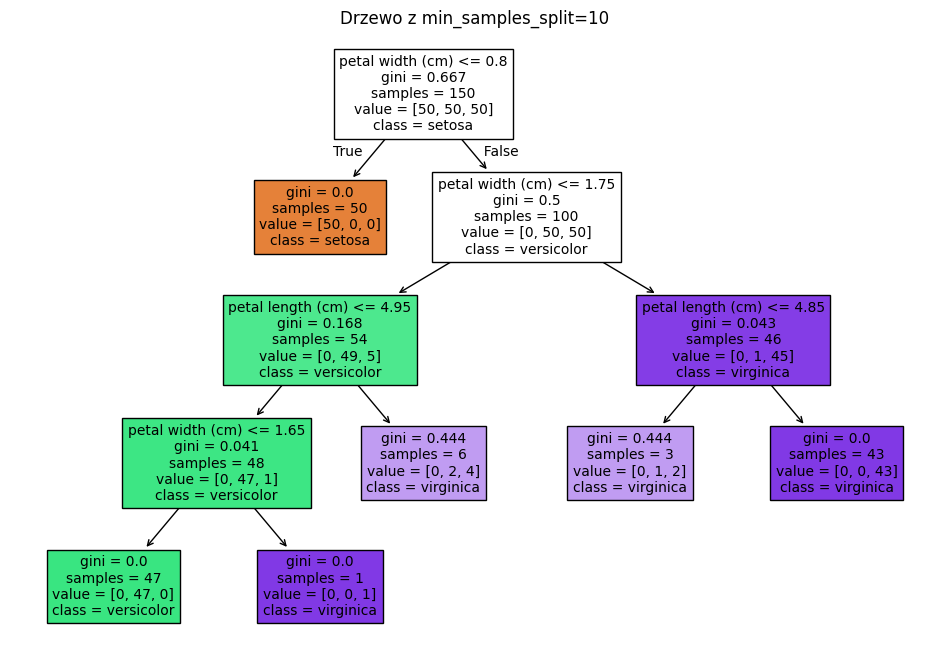

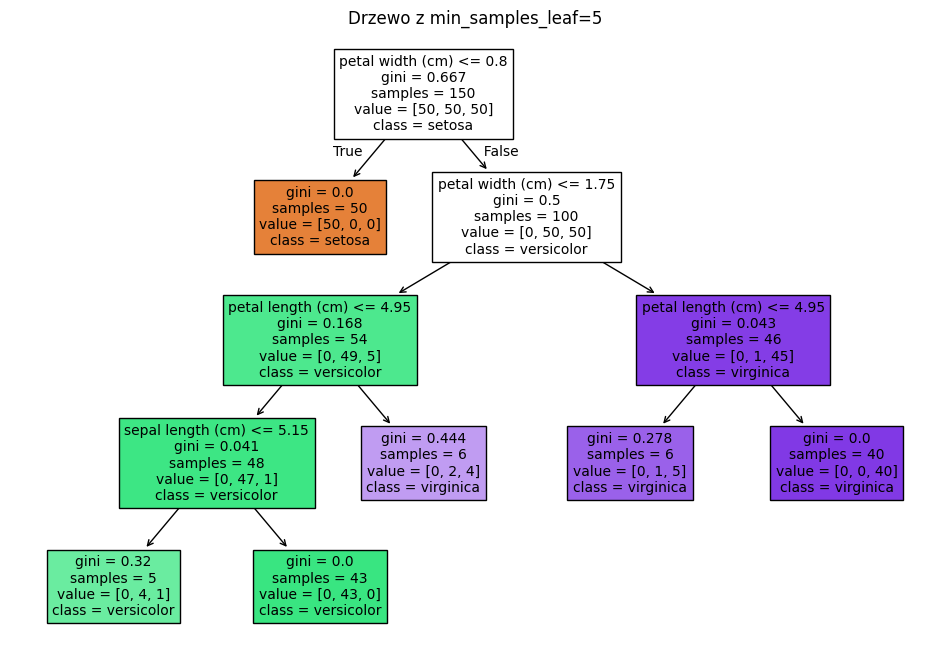

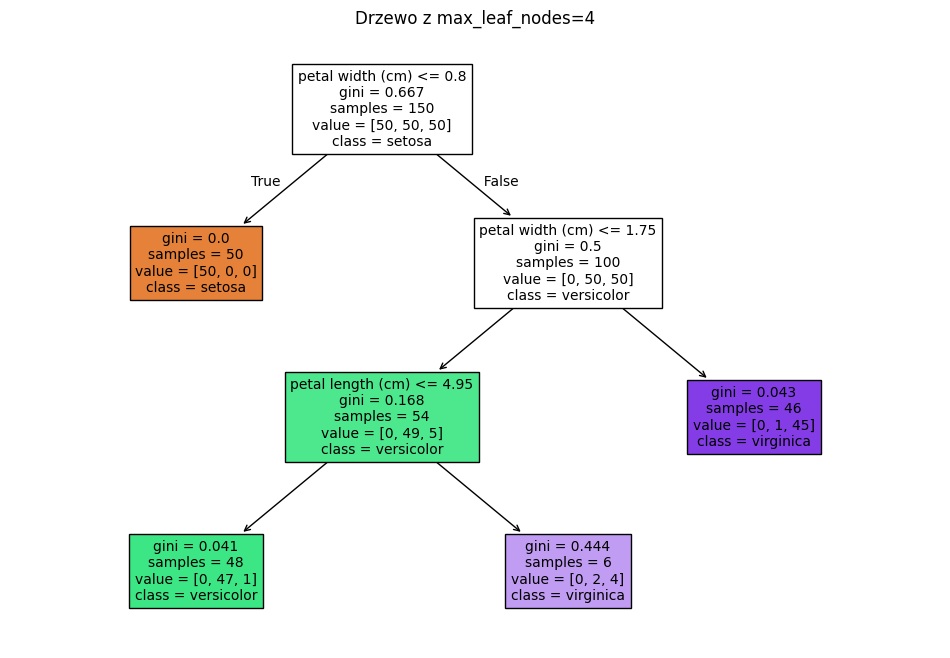

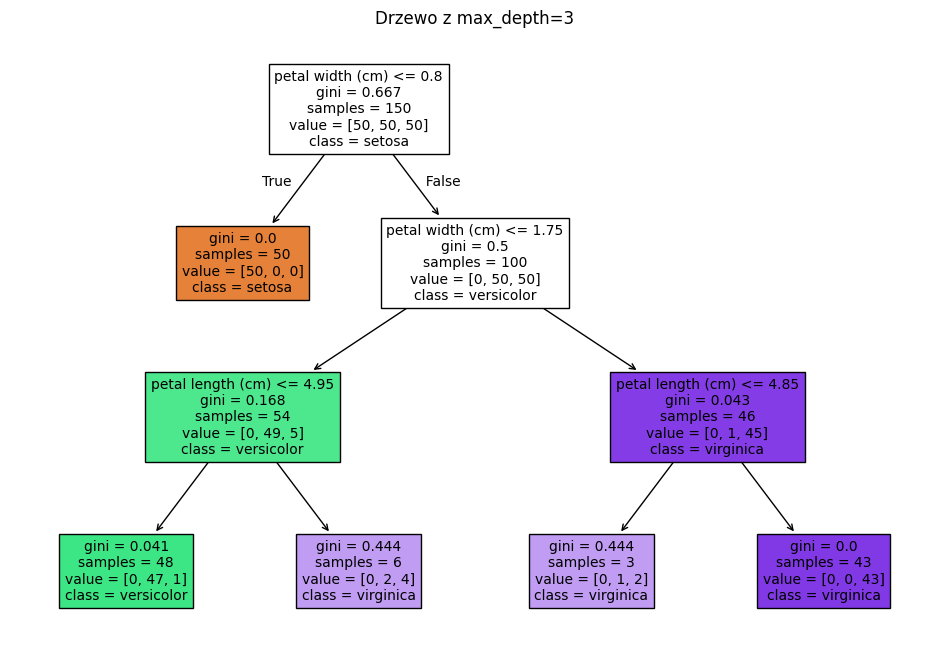

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()

def visualize_tree(clf, title):
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, fontsize=10)
    plt.title(title)
    plt.show()

tree_min_split = DecisionTreeClassifier(min_samples_split=10, random_state=0)
tree_min_split.fit(iris.data, iris.target)
visualize_tree(tree_min_split, "Drzewo z min_samples_split=10")
tree_min_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=0)
tree_min_leaf.fit(iris.data, iris.target)
visualize_tree(tree_min_leaf, "Drzewo z min_samples_leaf=5")
tree_max_leaf_nodes = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
tree_max_leaf_nodes.fit(iris.data, iris.target)
visualize_tree(tree_max_leaf_nodes, "Drzewo z max_leaf_nodes=4")
tree_max_depth = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_max_depth.fit(iris.data, iris.target)
visualize_tree(tree_max_depth, "Drzewo z max_depth=3")


**Zadanie 3 (0,5 pkt.):**

Zapoznaj się ze zbiorem danych digits:

http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Do wczytania danych wykorzystaj funkcję load_digits().

Zmodyfikuj drzewo mytree1 tak, aby minimalna liczba przykładów w liściu wynosiła 4. Zmodyfikuj drzewo mytree2 tak, aby nie miało ono więcej niż 5 liści. Porównaj teraz dokładność klasyfikacji obu drzew dla danych ze zbioru uczącego.

In [16]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

digits = load_digits()
X, y = digits.data, digits.target
mytree1 = DecisionTreeClassifier(min_samples_leaf=4, random_state=0)
mytree1.fit(X, y)
accuracy_tree1 = accuracy_score(y, mytree1.predict(X))
mytree2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
mytree2.fit(X, y)
accuracy_tree2 = accuracy_score(y, mytree2.predict(X))
print("Dokładność klasyfikacji drzewa mytree1 (min_samples_leaf=4):", accuracy_tree1)
print("Dokładność klasyfikacji drzewa mytree2 (max_leaf_nodes=5):", accuracy_tree2)

if accuracy_tree1 > accuracy_tree2:
    print("Drzewo mytree1 osiągnęło wyższą dokładność.")
elif accuracy_tree1 < accuracy_tree2:
    print("Drzewo mytree2 osiągnęło wyższą dokładność.")
else:
    print("Oba drzewa osiągnęły tę samą dokładność.")


Dokładność klasyfikacji drzewa mytree1 (min_samples_leaf=4): 0.9360044518642181
Dokładność klasyfikacji drzewa mytree2 (max_leaf_nodes=5): 0.4468558708959377
Drzewo mytree1 osiągnęło wyższą dokładność.


**Zadanie 4 (2 pkt):**

Dobierz optymalną wartość współczynnika `max_leaf_nodes` dla zbioru `digits`. W tym celu podziel zbiór danych `digits` na dwie części. Korzystając z pierwszego podzbioru przeprowadź walidację krzyżową wielokrotnie dla różnych wartości optymalizowanego współczynnika. Zidentyfikuj wartość optymalną, czyli taką, dla której średni błąd jest najmniejszy (szacowany w procesie walidacji krzyżowej). Po znalezieniu optymalnej wartości parametru naucz drzewo dla znalezionej wartości `max_leaf_nodes`. Tym razem do uczenia wykorzystaj cały pierwszy podzbiór danych. Następnie przetestuj skonstruowane drzewo na danych z drugego podzbioru. Porównaj otrzymane wyniki z wynikami otrzymanymi przed optymalizacją parametru `max_leaf_nodes`. Rozwiązując zadanie wyświetlaj wszystkie pośrednie wyniki (nie tylko końcowe).


In [17]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
leaf_nodes = range(2, 51)
mean_errors = []

for nodes in leaf_nodes:
    tree = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')  # 5-krotna walidacja
    mean_error = 1 - scores.mean()  # Średni błąd
    mean_errors.append(mean_error)
    print(f"max_leaf_nodes={nodes}, Średni błąd: {mean_error:.4f}")

optimal_nodes = leaf_nodes[mean_errors.index(min(mean_errors))]
print(f"\nOptymalna wartość max_leaf_nodes: {optimal_nodes}")
optimal_tree = DecisionTreeClassifier(max_leaf_nodes=optimal_nodes, random_state=42)
optimal_tree.fit(X_train, y_train)
y_pred_optimal = optimal_tree.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print(f"Dokładność drzewa z optymalnym max_leaf_nodes={optimal_nodes} na zbiorze testowym: {accuracy_optimal:.4f}")

default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)
y_pred_default = default_tree.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Dokładność drzewa bez optymalizacji na zbiorze testowym: {accuracy_default:.4f}")


max_leaf_nodes=2, Średni błąd: 0.7971
max_leaf_nodes=3, Średni błąd: 0.7112
max_leaf_nodes=4, Średni błąd: 0.6420
max_leaf_nodes=5, Średni błąd: 0.5807
max_leaf_nodes=6, Średni błąd: 0.5108
max_leaf_nodes=7, Średni błąd: 0.4479
max_leaf_nodes=8, Średni błąd: 0.4057
max_leaf_nodes=9, Średni błąd: 0.3747
max_leaf_nodes=10, Średni błąd: 0.3548
max_leaf_nodes=11, Średni błąd: 0.3230
max_leaf_nodes=12, Średni błąd: 0.2896
max_leaf_nodes=13, Średni błąd: 0.2760
max_leaf_nodes=14, Średni błąd: 0.2657
max_leaf_nodes=15, Średni błąd: 0.2545
max_leaf_nodes=16, Średni błąd: 0.2529
max_leaf_nodes=17, Średni błąd: 0.2466
max_leaf_nodes=18, Średni błąd: 0.2402
max_leaf_nodes=19, Średni błąd: 0.2299
max_leaf_nodes=20, Średni błąd: 0.2283
max_leaf_nodes=21, Średni błąd: 0.2235
max_leaf_nodes=22, Średni błąd: 0.2164
max_leaf_nodes=23, Średni błąd: 0.2164
max_leaf_nodes=24, Średni błąd: 0.2132
max_leaf_nodes=25, Średni błąd: 0.2076
max_leaf_nodes=26, Średni błąd: 0.2068
max_leaf_nodes=27, Średni błąd: 0

**Zadanie 5 (2 pkt):**

Podziel zbiór danych na uczące i testowe w stosunku 2:1. Przeprowadź uczenie i testowanie wielokrotnie zwiększając w kolejnych krokach wartość parametru `max_leaf_nodes`. Narysuj wykres pokazujący zależność błędu klasyfikacji od rozmiarów drzewa. Zależność tę pokaż zarówno dla danych testowych, jak i uczących.

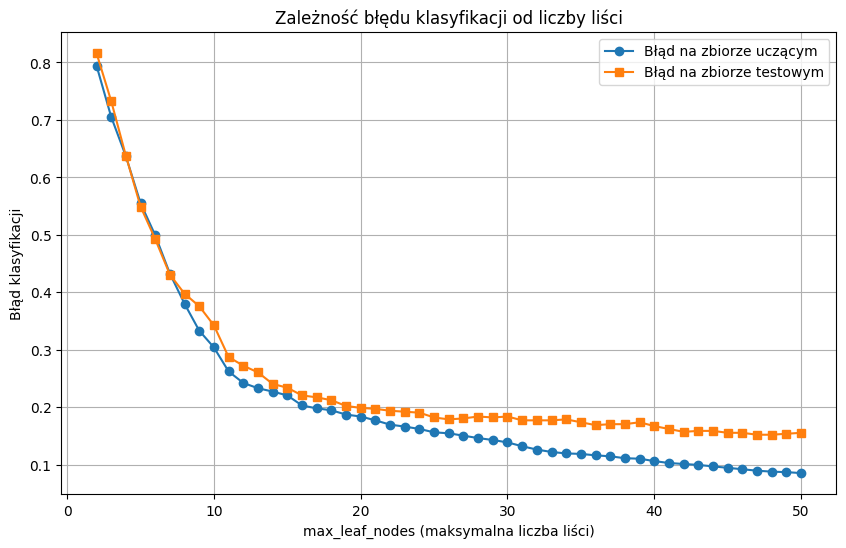

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

leaf_nodes = range(2, 51)
train_errors = []
test_errors = []

for nodes in leaf_nodes:
    tree = DecisionTreeClassifier(max_leaf_nodes=nodes, random_state=42)
    tree.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, tree.predict(X_train))
    train_errors.append(1 - train_accuracy)

    test_accuracy = accuracy_score(y_test, tree.predict(X_test))
    test_errors.append(1 - test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(leaf_nodes, train_errors, label='Błąd na zbiorze uczącym', marker='o')
plt.plot(leaf_nodes, test_errors, label='Błąd na zbiorze testowym', marker='s')
plt.xlabel('max_leaf_nodes (maksymalna liczba liści)')
plt.ylabel('Błąd klasyfikacji')
plt.title('Zależność błędu klasyfikacji od liczby liści')
plt.legend()
plt.grid()
plt.show()


# Lasy losowe #

Zapoznaj się z opisem klasy `RandomForestClassifier`

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [23]:
from sklearn.ensemble import RandomForestClassifier

**Zadanie 6 (1,5 pkt.)**

Dla zbioru danych digits skonstruuj las losowy zawierający 20 drzew. 

a) Jaki jest błąd klasyfikacji dla zbioru uczącego?

b) Jaki jest błąd klasyfikacji oszacowany w procesie walidacji krzyżowej?

c) Która cyfra (klasa) jest najlepiej rozpoznawana a która najsłabiej?

d) Jakiego rodzaju błąd jest najczęściej popełniany (która cyfra z którą jest najczęściej mylona)?

In [26]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

digits = load_digits()
X, y = digits.data, digits.target

rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X, y)

y_train_pred = rf.predict(X)
train_accuracy = accuracy_score(y, y_train_pred)
train_error = 1 - train_accuracy
print(f"Błąd klasyfikacji dla zbioru uczącego: {train_error:.4f}")

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
cv_error = 1 - cv_scores.mean()
print(f"Błąd klasyfikacji w walidacji krzyżowej: {cv_error:.4f}")

y_pred = rf.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred, output_dict=True)

class_accuracies = {int(key): value["precision"] for key, value in report.items() if key.isdigit()}
best_class = max(class_accuracies, key=class_accuracies.get)
worst_class = min(class_accuracies, key=class_accuracies.get)

print(f"Najlepiej rozpoznawana cyfra: Cyfra {best_class}")
print(f"Najgorzej rozpoznawana cyfra: Cyfra {worst_class}")

most_confused = conf_matrix.copy()
np.fill_diagonal(most_confused, 0)
most_confused_pair = divmod(most_confused.argmax(), most_confused.shape[1])

print(f"Najczęściej mylona jest cyfra {most_confused_pair[0]} z cyfrą {most_confused_pair[1]}")


Błąd klasyfikacji dla zbioru uczącego: 0.0000
Błąd klasyfikacji w walidacji krzyżowej: 0.0668
Najlepiej rozpoznawana cyfra: Cyfra 0
Najgorzej rozpoznawana cyfra: Cyfra 0
Najczęściej mylona jest cyfra 0 z cyfrą 0


**Zadanie 7 (1 pkt.)**
Dla każdej klasy podaj poprawność klasyfikacji, czyli stosunek poprawnie zaklasyfikowanych przykładów danej klasy do wszystkich przykładów danej klasy. Jest to jeden z parametrów jakości klasyfikatora, tzw. recall. Można w tym celu wykorzystać funkcję `recall_score` lub wyznaczyć odpowiednie wartości samodzielnie korzystając z macierzy błędów (confusion matrix). Wyznacz wartości recall na dwa sposoby.

In [27]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score

digits = load_digits()
X, y = digits.data, digits.target

rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X, y)

y_pred = rf.predict(X)


recall_by_function = recall_score(y, y_pred, average=None)
print("Recall dla każdej klasy (funkcja recall_score):")
for i, recall in enumerate(recall_by_function):
    print(f"Klasa {i}: {recall:.4f}")

conf_matrix = confusion_matrix(y, y_pred)
recall_by_matrix = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
print("\nRecall dla każdej klasy (obliczone ręcznie):")
for i, recall in enumerate(recall_by_matrix):
    print(f"Klasa {i}: {recall:.4f}")


Recall dla każdej klasy (funkcja recall_score):
Klasa 0: 1.0000
Klasa 1: 1.0000
Klasa 2: 1.0000
Klasa 3: 1.0000
Klasa 4: 1.0000
Klasa 5: 1.0000
Klasa 6: 1.0000
Klasa 7: 1.0000
Klasa 8: 1.0000
Klasa 9: 1.0000

Recall dla każdej klasy (obliczone ręcznie):
Klasa 0: 1.0000
Klasa 1: 1.0000
Klasa 2: 1.0000
Klasa 3: 1.0000
Klasa 4: 1.0000
Klasa 5: 1.0000
Klasa 6: 1.0000
Klasa 7: 1.0000
Klasa 8: 1.0000
Klasa 9: 1.0000


**Zadanie 8 (1,5 pkt.)**

Wykreśl zależność błędu klasyfikacji lasu losowego od liczby drzew w lesie. Błąd klasyfikacji szacuj w procesie 5-krotnej walidacji krzyżowej.

Liczba drzew: 1, Błąd klasyfikacji: 0.2715
Liczba drzew: 6, Błąd klasyfikacji: 0.1263
Liczba drzew: 11, Błąd klasyfikacji: 0.0907
Liczba drzew: 16, Błąd klasyfikacji: 0.0729
Liczba drzew: 21, Błąd klasyfikacji: 0.0690
Liczba drzew: 26, Błąd klasyfikacji: 0.0662
Liczba drzew: 31, Błąd klasyfikacji: 0.0595
Liczba drzew: 36, Błąd klasyfikacji: 0.0612
Liczba drzew: 41, Błąd klasyfikacji: 0.0623
Liczba drzew: 46, Błąd klasyfikacji: 0.0584
Liczba drzew: 51, Błąd klasyfikacji: 0.0584
Liczba drzew: 56, Błąd klasyfikacji: 0.0590
Liczba drzew: 61, Błąd klasyfikacji: 0.0601
Liczba drzew: 66, Błąd klasyfikacji: 0.0601
Liczba drzew: 71, Błąd klasyfikacji: 0.0623
Liczba drzew: 76, Błąd klasyfikacji: 0.0629
Liczba drzew: 81, Błąd klasyfikacji: 0.0606
Liczba drzew: 86, Błąd klasyfikacji: 0.0606
Liczba drzew: 91, Błąd klasyfikacji: 0.0617
Liczba drzew: 96, Błąd klasyfikacji: 0.0595


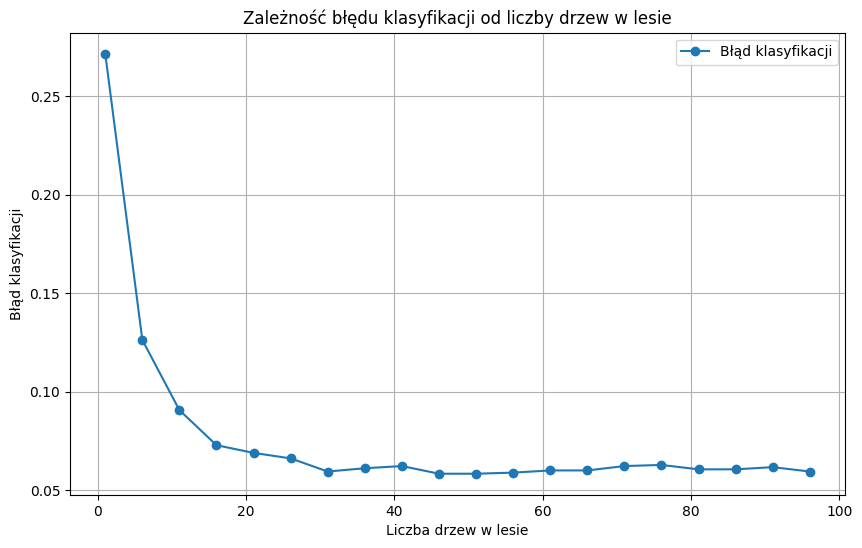

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


digits = load_digits()
X, y = digits.data, digits.target


num_trees = range(1, 101, 5)
errors = []

for n_trees in num_trees:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
    error = 1 - scores.mean()
    errors.append(error)
    print(f"Liczba drzew: {n_trees}, Błąd klasyfikacji: {error:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(num_trees, errors, marker='o', linestyle='-', label='Błąd klasyfikacji')
plt.xlabel('Liczba drzew w lesie')
plt.ylabel('Błąd klasyfikacji')
plt.title('Zależność błędu klasyfikacji od liczby drzew w lesie')
plt.grid(True)
plt.legend()
plt.show()
